In [ ]:
import sys
sys.path.append('..')

import pickle
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.neighbors import NearestNeighbors

from src.sanity_check import is_valid

In [4]:
with open('icon_data.pkl', 'rb') as f:
    images, alt_texts = pickle.load(f)

In [5]:
valid_idxs = [idx
              for idx, alt_text in enumerate(alt_texts)
              if is_valid(alt_text)]
images = [images[idx]
          for idx in valid_idxs]
alt_texts = [alt_texts[idx]
             for idx in valid_idxs]

In [6]:
def normalize_text(alt_text):
    return alt_text.lower()

In [7]:
def word_split(alt_text):
    return alt_text.split(' ')

In [8]:
lemmatizer = WordNetLemmatizer()

all_words = [lemmatizer.lemmatize(word)
             for alt_text in alt_texts
             for word in word_split(normalize_text(alt_text))]

In [9]:
stop_words = set(stopwords.words('english'))
all_words = [word
             for word in all_words
             if word not in stop_words]

In [10]:
bow_words = [word
             for word, freq in Counter(all_words).most_common(5000)]

In [11]:
def get_bow_embedding(text, lemmatizer, stop_words, bow_words):
    embedding = np.zeros(len(bow_words) + 1)
    for word in word_split(normalize_text(text)):
        word = lemmatizer.lemmatize(word)
        
        if word not in stop_words:
            if word not in bow_words:
                idx = len(bow_words)
            else:
                idx = bow_words.index(word)
            embedding[idx] += 1
    
    return embedding

In [12]:
bow_embeddings = [get_bow_embedding(alt_text, lemmatizer, stop_words, bow_words)
                  for alt_text in tqdm(alt_texts)]

100%|██████████| 18728/18728 [00:04<00:00, 3834.92it/s]


In [15]:
nn_search = NearestNeighbors(n_neighbors=10, metric='euclidean')

In [16]:
nn_search.fit(bow_embeddings)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

Cocoon in the Park
[10956    99  3460 10951  1128 10947  6134 10953 10945 10950]
['SeaWorld Parks', 'Cocoon in the Park', 'product-red', 'Duplicate', 'investFeed', 'Motorsport.com', 'icon-battery', 'mobile-tablet', 'GDA', 'Водолей']


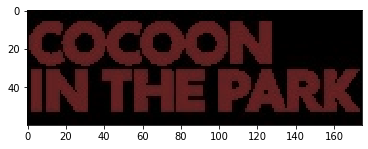

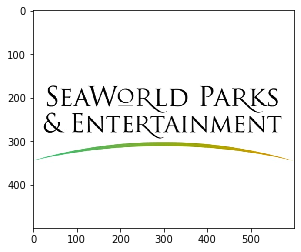

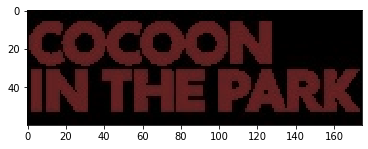

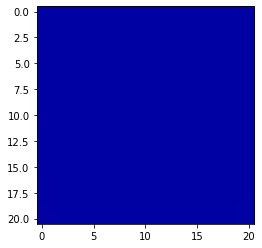

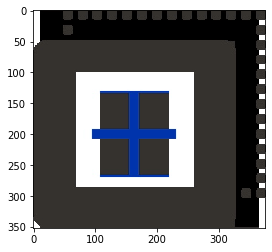

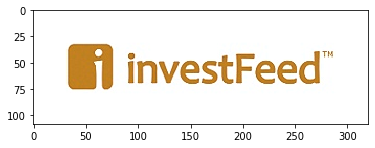

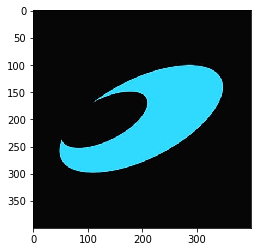

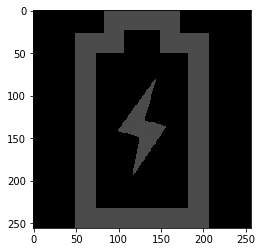

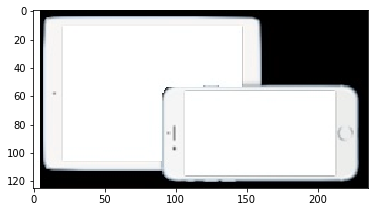

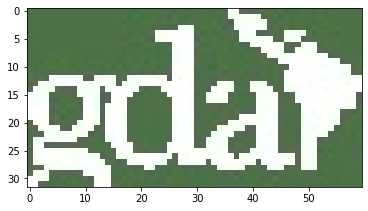

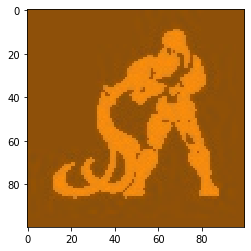

In [39]:
idx = 99
print(alt_texts[idx])
plt.figure()
plt.imshow(images[idx])

nn_idxs = nn_search.kneighbors([bow_embeddings[idx]])[1][0]
print(nn_idxs)
print([alt_texts[idx]
       for idx in nn_idxs])

for idx in nn_idxs:
    plt.figure()
    plt.imshow(images[idx])
plt.show()